In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import tensorflow as tf
import numpy as np
import math
import matplotlib
#matplotlib.use("Agg")
import matplotlib.image as mpimg
import glob
from data_utils import load_data, augment_data,normalise_train,normalise_test,rgb2gray,rgb2lab,lab2rgb
import matplotlib.pyplot as plt
from tucha import complex_pokemon_model,baselinish,simpler_model,baselinish2,complex_pokemon_model2


In [2]:
X_train,X_test,Y_train, Y_test = load_data()
print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

0
(49, 64, 64, 1)
(13, 64, 64, 1)
(49, 64, 64, 3)
(13, 64, 64, 3)


In [ ]:
def show_images(images,gray = False):

    
    if(gray):
        plt.imshow(images,cmap = plt.get_cmap('gray'))
    else :
        plt.imshow(images);

    plt.show()

In [ ]:
tf.reset_default_graph()
Y = tf.placeholder(tf.uint8 ,[None , 64,64,3])
is_training = tf.placeholder(tf.bool)


with tf.variable_scope("model") as scope:
    #hsv_out,rgb_out,hsv_in,rgb_in = baselinish2(Y,is_training)
    hsv_out,rgb_out,hsv_in,rgb_in = complex_pokemon_model2(Y,is_training)
    loss = tf.reduce_mean(tf.square(hsv_out-hsv_in))   
    optimiser = tf.train.AdamOptimizer(1e-3)
    train_step = optimiser.minimize(loss)


sess = tf.Session()
sess.run(tf.global_variables_initializer())

batch_size = 24
epoch_number = 0
def train_epoch(target):
    sizee = target.shape[0]
    for i in range(sizee//batch_size):
        feed_dict = {Y: (target[i*batch_size:batch_size*i+batch_size]),is_training:True}
        losses,_,rgb_o,rgb_i = sess.run([loss,train_step,rgb_out,rgb_in],feed_dict)
        #if(i%5==0):
        print (losses)
        if(i %5 == 0):
            
        if(i%50 == 0):
            show_images(rgb_o[5])
            show_images(rgb_i[5])

  

def val_result(data, target):
    sizee = data.shape[0]
    for i in range(sizee//batch_size):
        feed_dict = {Y:  (target[i*batch_size:batch_size*i+batch_size]), X: data[i*batch_size:batch_size*i+batch_size],is_training:False}
        losses = sess.run([loss_test,rgb_out],feed_dict)
        if(i%5 ==0):
            print (losses)
            
#saver = tf.train.Saver()
num_epochs = 50
for i in range(num_epochs):
    epoch_number = i
 #   saver.save(sess,'my_model')
    train_epoch(Y_train)
    print ("Next Epoch",i)
    
    #val_result(X_test, Y_test)

    


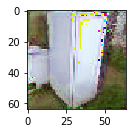

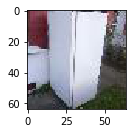

In [44]:
### Image visualisation
import matplotlib.pyplot as plt
import numpy.random as rnd


rand_indices = np.random.choice(40,24)
samp = Y_train[rand_indices]


feed_dict = {Y:samp,is_training:True}
losses,_,rgb_o,rgb_i = sess.run([loss,train_step,rgb_out,rgb_in],feed_dict)
show_images(rgb_o[0])
show_images(rgb_i[0])

def show_images(images,gray = False):

    
    if(gray):
        plt.imshow(images,cmap = plt.get_cmap('gray'))
    else :
        plt.imshow(images);

    plt.show()
    